In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Normal Plot (Watts_Strogatz)

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


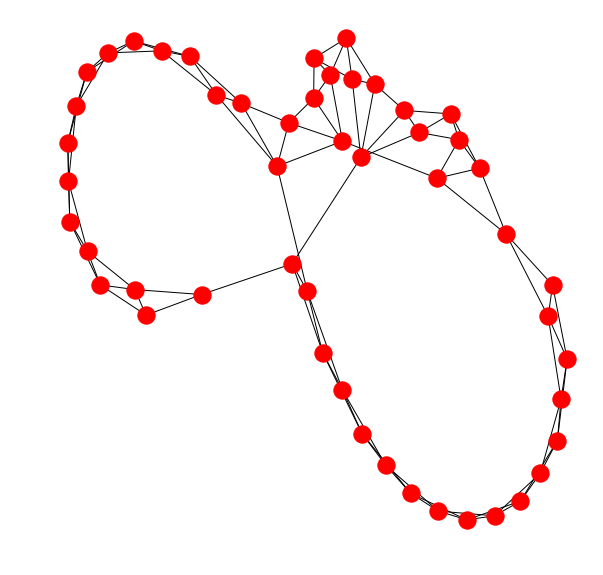

In [2]:
G = nx.watts_strogatz_graph(50,4,0.05)
fig, axes = plt.subplots(figsize=(10,10))
nx.draw(G)

It's possible to change all the parameters of the network: color of nodes, edges, thickness, transparency, it's possible to fix the position of all nodes, of only certain nodes and compute the rest with a layout..

Evolution of a force direct layout.
If it's too slow decrease the number of nodes in the network.

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


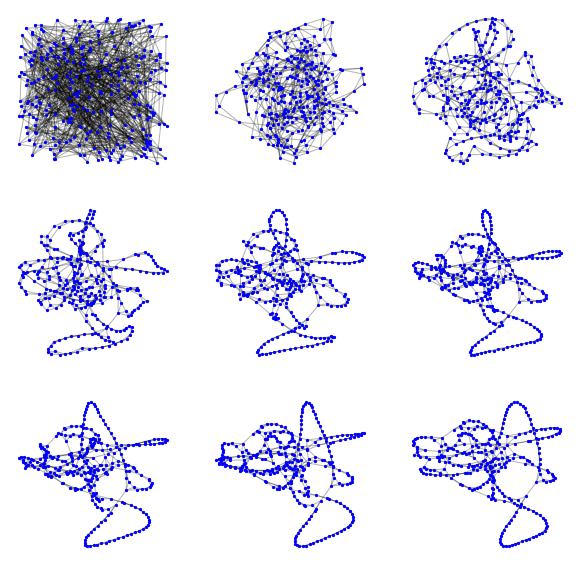

In [3]:
# creating the network
G = nx.watts_strogatz_graph(300,4,0.05)
initial_pos = {i:np.random.rand(2) for i in G.nodes}

# creating the fig
fig, axes = plt.subplots(3,3, figsize=(10,10))

axes = axes.flatten()

for i,ax in enumerate(axes):
    plt.sca(ax)
    ax = plt.gca()
    
    # computing a force direct layout
    pos = nx.layout.spring_layout(G, iterations=int(100/len(axes)*i), pos=initial_pos)
    
    #drawing nodes and edges
    nx.draw_networkx_nodes(G, pos=pos, node_size=5, node_color='b')
    nx.draw_networkx_edges(G, pos=pos, alpha=0.3)
    
    # taking out the spines and the axis labels
    [ax.spines[s].set_visible(False) for s in ax.spines]
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

# Communities

In [4]:
G = nx.karate_club_graph()

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


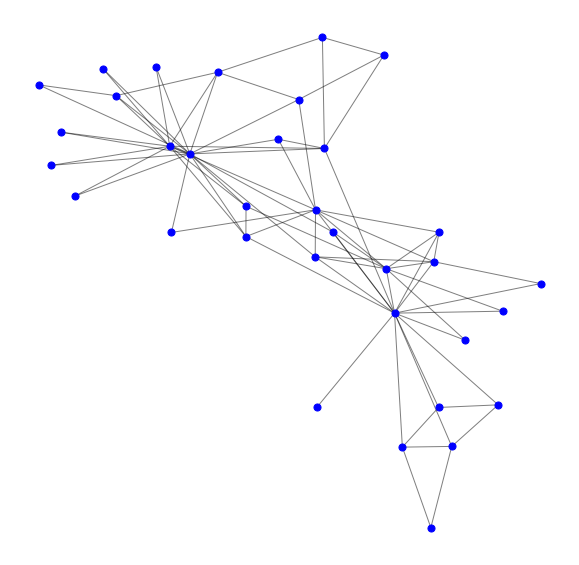

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

# computing a force direct layout
pos = nx.layout.spring_layout(G)

#drawing nodes and edges
nx.draw_networkx_nodes(G, pos=pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos=pos, alpha=0.5)

[ax.spines[s].set_visible(False) for s in ax.spines]
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

In [6]:
gn0 = [c for c in nx.community.girvan_newman(G)][0]
gn0

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

Creating a list of colors according to the community

In [7]:
community_color = ['b' if i in gn0[0] else 'r' for i in G.nodes]

Note that the size of the nodes is proportional to the degree!

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


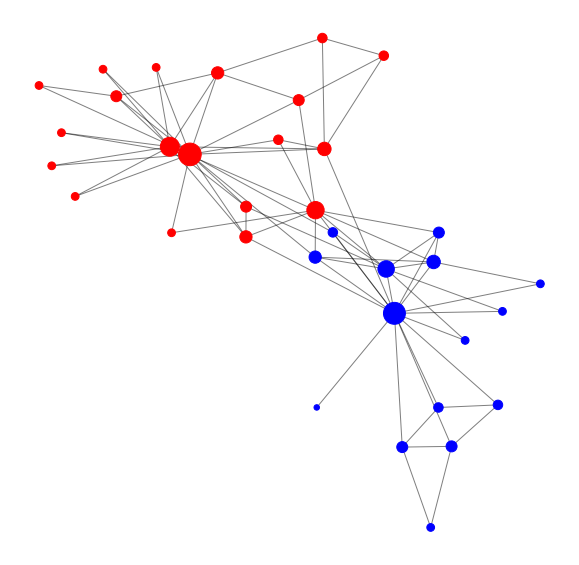

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

#drawing nodes and edges
nx.draw_networkx_nodes(G, pos=pos, node_color=community_color,
                       node_size=[G.degree[n]*30 for n in G.nodes])
nx.draw_networkx_edges(G, pos=pos, alpha=0.5)

[ax.spines[s].set_visible(False) for s in ax.spines]
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

# I will add something more before tomorrow morning

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast<br>
  1 = Big East<br>
  2 = Big Ten<br>
  3 = Big Twelve<br>
  4 = Conference USA<br>
  5 = Independents<br>
  6 = Mid-American<br>
  7 = Mountain West<br>
  8 = Pacific Ten<br>
  9 = Southeastern<br>
 10 = Sun Belt<br>
 11 = Western Athletic<br>

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


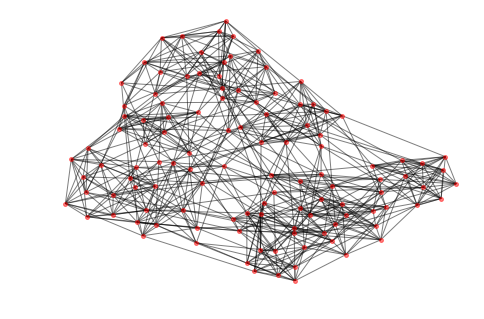

In [9]:
G = nx.read_gml('./football.gml')

nx.draw_spring(G, node_size=15, alpha=0.5)

In [18]:
from functools import reduce

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


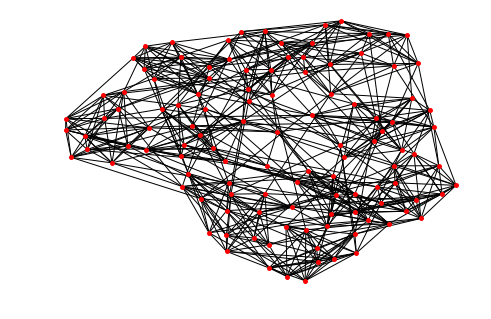

In [22]:
G = nx.read_gml('./football.gml')
nx.draw_spring(G, node_size=15)

In [20]:
gn11 = [c for c in nx.community.girvan_newman(G)][11]
print(gn11[:3])
community_dict = reduce(lambda d, next_d: d.update(next_d) or d, [{i:j for i in s} for (j,s) in enumerate(gn11)], dict())

({'SanDiegoState', 'BrighamYoung', 'Utah', 'Wyoming', 'NewMexico', 'NevadaLasVegas', 'ColoradoState', 'AirForce'}, {'NorthCarolinaState', 'Duke', 'Virginia', 'Clemson', 'NorthCarolina', 'GeorgiaTech', 'Maryland', 'FloridaState', 'WakeForest'}, {'Northwestern', 'Wisconsin', 'Iowa', 'Purdue', 'Indiana', 'PennState', 'Michigan', 'Minnesota', 'Illinois', 'OhioState', 'MichiganState'})


In [24]:
pos = nx.layout.spring_layout(G, iterations=200)

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


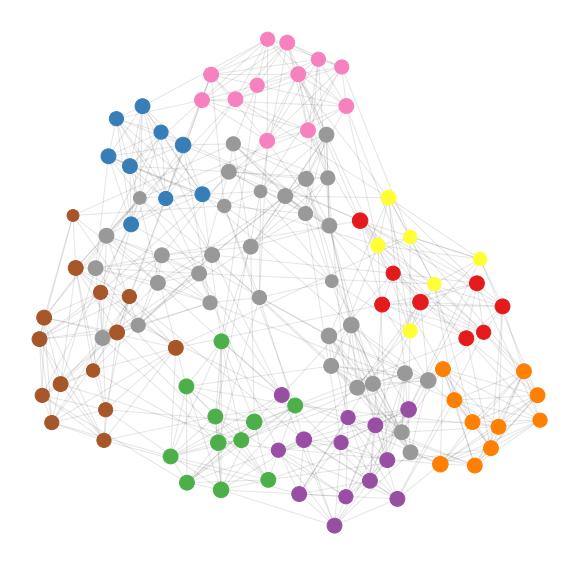

In [48]:
fig, ax = plt.subplots(figsize=(10,10))

#drawing nodes and edges
nx.draw_networkx_nodes(G, pos=pos,
                       node_color=[plt.cm.Set1(community_dict[i]) for i in G.nodes],
                       node_size=[G.degree[n]*20 for n in G.nodes])
nx.draw_networkx_edges(G, pos=pos, alpha=0.1, edge_color='k')

[ax.spines[s].set_visible(False) for s in ax.spines]
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

In [55]:
for i,j in G.edges():
    if community_dict[i]==community_dict[j]:
        G.edges[i,j]['weight'] = 10
    else:
        G.edges[i,j]['weight'] = 1

In [56]:
pos = nx.layout.spring_layout(G, iterations=200, weight='weight')

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


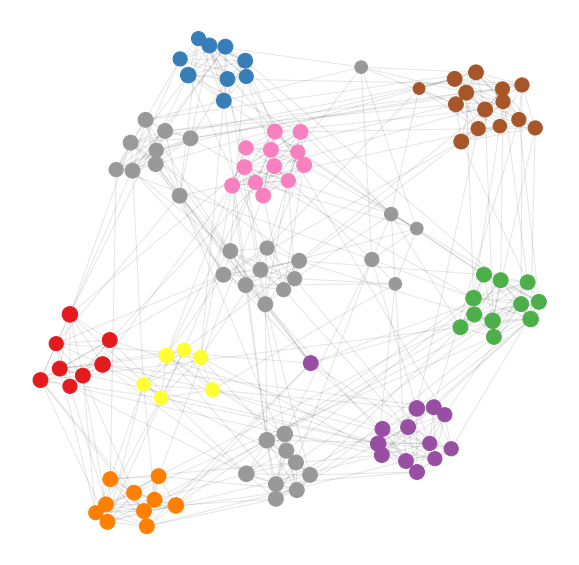

In [57]:
fig, ax = plt.subplots(figsize=(10,10))

#drawing nodes and edges
nx.draw_networkx_nodes(G, pos=pos,
                       node_color=[plt.cm.Set1(community_dict[i]) for i in G.nodes],
                       node_size=[G.degree[n]*20 for n in G.nodes])
nx.draw_networkx_edges(G, pos=pos, alpha=0.1, edge_color='k')

[ax.spines[s].set_visible(False) for s in ax.spines]
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([]);

## Another community detection algo

In [72]:
import community

In [ ]:
community.

In [70]:
kclique = nx.community.(G, 4)

In [71]:
[c for c in kclique][0]

frozenset({'AirForce',
           'BrighamYoung',
           'ColoradoState',
           'Nevada',
           'NevadaLasVegas',
           'NewMexico',
           'SanDiegoState',
           'Utah',
           'Wyoming'})

In [ ]:
gn11 = [c for c in nx.community.kclique.k_clique_communities(G`)][11]
print(gn11[:3])
community_dict = reduce(lambda d, next_d: d.update(next_d) or d, [{i:j for i in s} for (j,s) in enumerate(gn11)], dict())

# Playing with networkx

In [70]:
G = nx.barabasi_albert_graph(100, 3)

In [71]:
dims = np.power(np.array([v for k,v in G.degree]),1.4)*3

In [72]:
# the l more central nodes fixed along a circonference.
def f(l=5, radius=40):
    min_k = sorted([v for k,v in G.degree])[-l]
    fixed = [True if v>=min_k else False for k,v in G.degree]
    fixed_nodes = [k for k,v in G.degree if v>=min_k]
    rotations = np.cumsum(fixed)*1j
    n_fixed = sum(fixed)
    pos0 = {n: (lambda x: (0.5+x.real,0.5+x.imag))(radius*np.exp(2*np.pi/n_fixed*rotations[n])) if fixed[n] else np.random.rand(2)  for n in G.nodes}
    fig, axes = plt.subplots(figsize=(10,10))
    axes.set_facecolor('#efeff3')
    plt.axis('equal')
    nx.draw_networkx(G, 
                     pos=nx.spring_layout(G, k=15, pos=pos0, fixed=fixed_nodes, iterations=500, weight='weight', center=(0,0), dim=2),
                     node_size=dims,
                     node_color='#000045',
                     with_labels=False,
                     edge_color='#555530'
                    )
    
    ax = plt.gca()
    [ax.spines[s].set_visible(False) for s in ax.spines]
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([]);

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


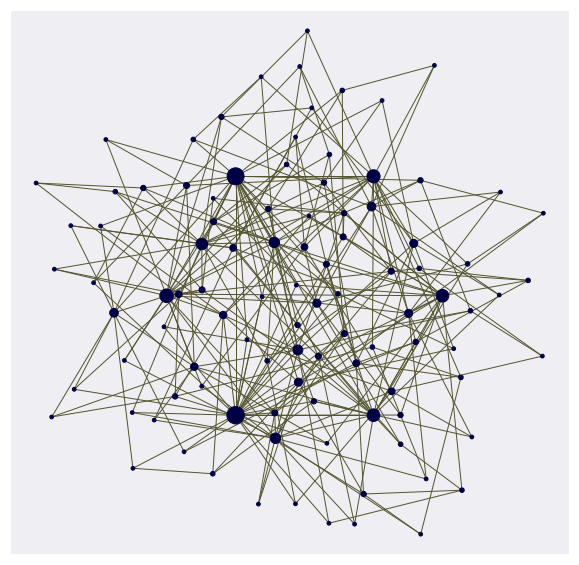

In [73]:
f()

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


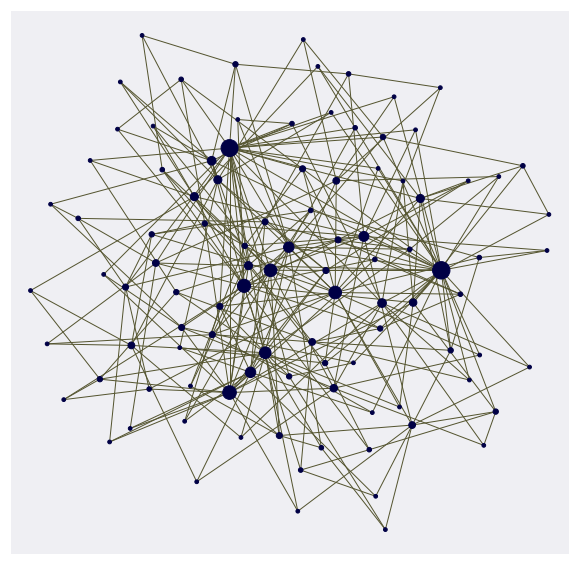

In [74]:
f(3,40)

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


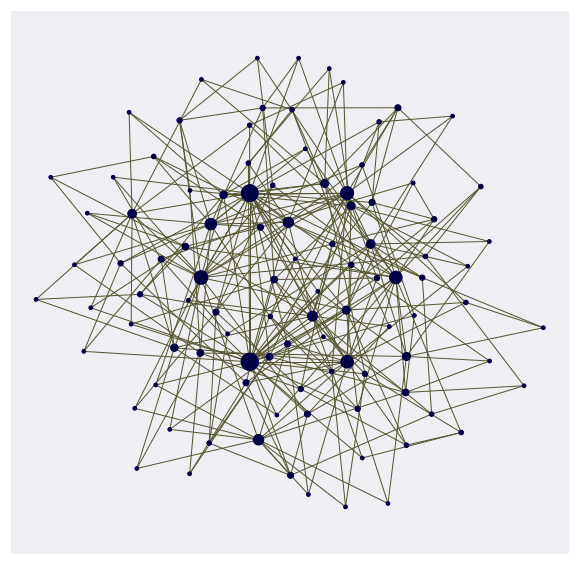

In [75]:
f(5,30)

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


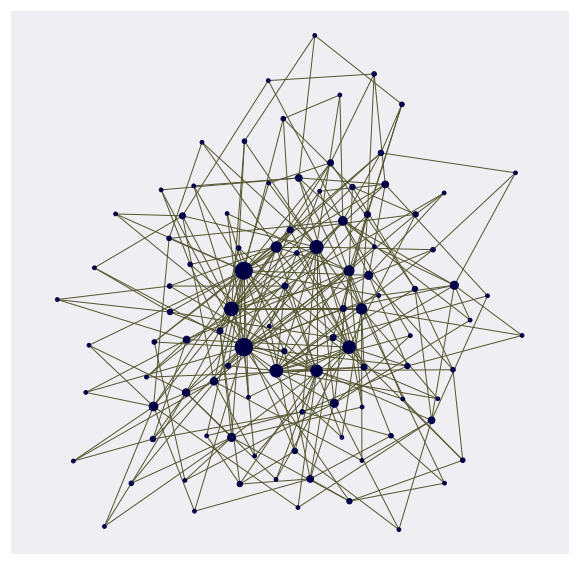

In [76]:
f(10,20)

/home/matteo/.conda/envs/ALLIN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


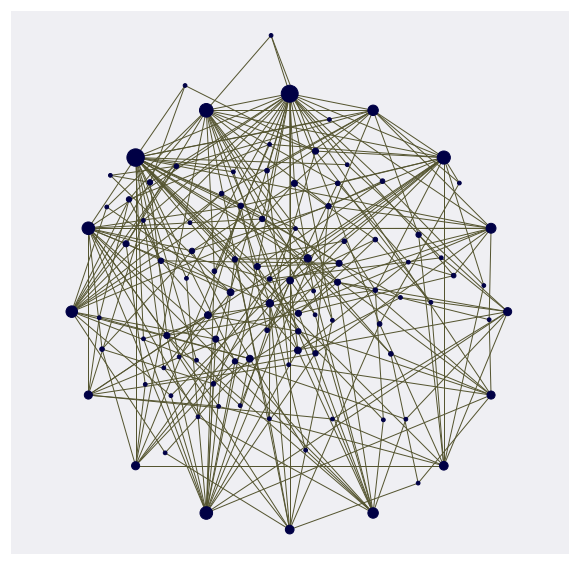

In [77]:
f(15,80)